<a href="https://colab.research.google.com/github/ShreyaSutar2004/Plant_Disease_Classifier/blob/main/PLantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Libraries

In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0
 99% 1.23G/1.25G [00:14<00:00, 129MB/s]
100% 1.25G/1.25G [00:14<00:00, 93.3MB/s]


In [12]:
!unzip pdrd.zip

Archive:  pdrd.zip
  inflating: Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: Test/Test/Healthy/8e6a823cce9ff40c.jpg  
  inflating: Test/Test/Healthy/8e77857194a59a87.jpg  
  inflating: Test/Test/Healthy/8e79802b3fb770c8.jpg  
  inflating: Test/Test/Healthy/8e7986d1ecd36445.jpg  
  inflating: Test/Test/Healthy/8e7e70a6878c1c79.jpg  
  inflating: Test/Test/Healthy/8e82b1a51bd11afe.jpg  
  inflating: Test/Test/Healthy/8e8470687be37378.jpg  
  inflating: Test/Test/Healthy/8e858c8397706b7b.jpg  
  inflating: Test/Test/Healthy/8e8835d2ebdbc503.jpg  
  inflati

In [4]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [5]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 57.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but yo

In [6]:
!pip install hvplot

Importing Libraries

In [7]:
import gradio as gr

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

Getting Dataset

In [9]:
data_dir = '/content/Test/Test'

Testing Dataset 1

In [10]:
import glob
import os
import PIL
import os # Redundant import

data_dir = '/content/Test/Test/' # Add this in case it wasn't run in this cell

healthy_dir = os.path.join(data_dir, 'Healthy/*')
# Check if the path is valid and points to an existing directory
if os.path.exists(os.path.join(data_dir, 'Healthy')):
  Healthy = glob.glob(healthy_dir)
  # Check if any files were found
  if Healthy:
      print(f"Found {len(Healthy)} healthy images") # added for debugging
      # Proceed only if files were found
      print(Healthy[0])
      try:
        image = PIL.Image.open(Healthy[0])
        image.show() # Added for debugging
      except Exception as e:
        print(f"Error opening image {Healthy[0]}: {e}") #Added for debugging
  else:
      print(f"No healthy images found in directory: {os.path.join(data_dir, 'Healthy')}")
else:
  print(f"Directory not found: {os.path.join(data_dir, 'Healthy')}")


Directory not found: /content/Test/Test/Healthy


Preprocessing Images in Dataset

In [13]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=5,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 150 files belonging to 3 classes.
Using 120 files for training.


In [14]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=5,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 150 files belonging to 3 classes.
Using 30 files for validation.


Testing Dataset 2

In [15]:
class_names = train_ds.class_names
print(class_names)

['Healthy', 'Powdery', 'Rust']


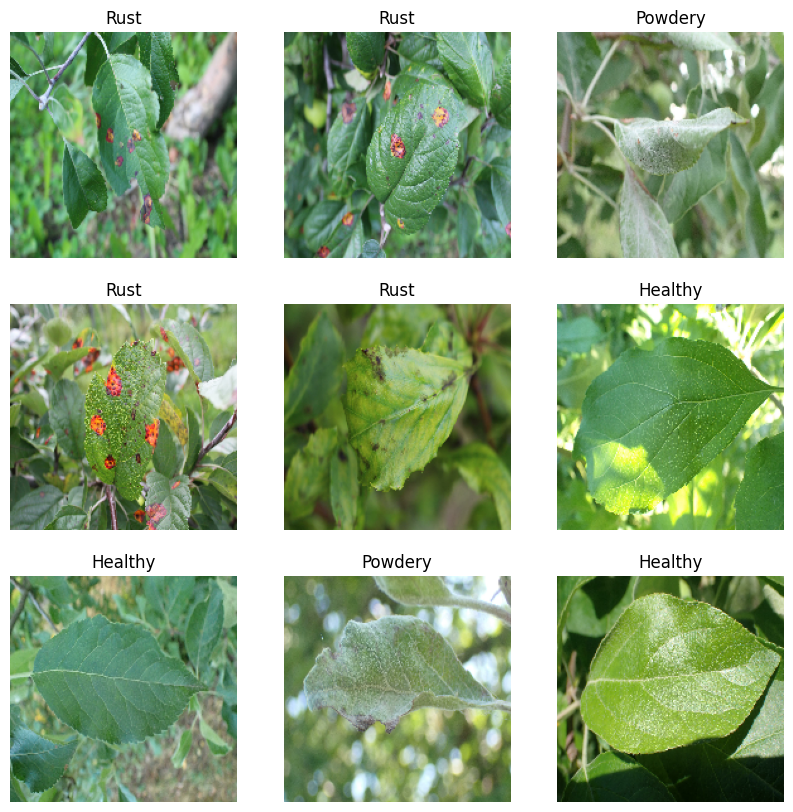

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Creating Model

In [17]:
num_classes = 5

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling Model

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training Model

In [20]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3646 - loss: 1.1094 - val_accuracy: 0.4000 - val_loss: 1.1628
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4302 - loss: 1.0221 - val_accuracy: 0.4333 - val_loss: 1.0697
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6133 - loss: 0.9368 - val_accuracy: 0.5333 - val_loss: 0.9306
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6867 - loss: 0.8050 - val_accuracy: 0.5000 - val_loss: 0.9545
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8042 - loss: 0.6704 - val_accuracy: 0.6333 - val_loss: 0.8002
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8398 - loss: 0.4823 - val_accuracy: 0.5667 - val_loss: 1.0251
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8221 - loss: 0.4668 - val_accuracy: 0.6333 - val_loss: 0.6477
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9179 - loss: 0.3124 - val_accuracy: 0.7333 - val_loss: 0.6767
Epoch 9/15
4/4 

In [21]:
import pickle
model.save('model.h5')

Configuring GUI

In [22]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

Running Webapp

In [24]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
from scipy.special import softmax

# Load the trained model
try:
    model = load_model("/content/model.h5")
except Exception as e:
    print(f"Error loading the model: {e}")
    print("Ensure that 'model.h5' exists in the /content/ directory.")
    exit()  # Exit if the model is not loaded

# Define class names (Make sure these match the model's output labels)
class_names = ["Healthy", "Powdery", "Rust"]

def predict_image(img):
    img = np.array(img)

    # Resize image (Make sure this matches the training process)
    img_resized = tf.image.resize(img, (180, 180))

    # Normalize image if required (Adjust based on training settings)
    img_resized = img_resized / 255.0

    # Expand dimensions for batch processing
    img_4d = np.expand_dims(img_resized, axis=0)

    # Get model predictions
    prediction = model.predict(img_4d)[0]

    # Debugging: Print raw model output
    print("Raw Model Output:", prediction)


    # Convert to percentages
    prediction_dict = {class_names[i]: round(float(prediction[i]), 2) for i in range(len(class_names))}

    print("Final Predictions:", prediction_dict)

    return prediction_dict


# Gradio Interface
iface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(),
    live=True
)

iface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://748ace3021bd55ecdb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
Raw Model Output: [3.0094877e-01 5.9691523e-03 6.9258440e-01 2.6184163e-04 2.3588806e-04]
Final Predictions: {'Healthy': 0.3, 'Powdery': 0.01, 'Rust': 0.69}


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2108, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1655, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Raw Model Output: [3.0627027e-01 6.0065552e-03 6.8721426e-01 2.6690666e-04 2.4201961e-04]
Final Predictions: {'Healthy': 0.31, 'Powdery': 0.01, 'Rust': 0.69}


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2108, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1655, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Raw Model Output: [3.0147523e-01 5.8607724e-03 6.9217515e-01 2.5691438e-04 2.3186964e-04]
Final Predictions: {'Healthy': 0.3, 'Powdery': 0.01, 'Rust': 0.69}
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://748ace3021bd55ecdb.gradio.live
